In [ ]:
import pandas as pd

In [ ]:
import numpy as np

##Задание 1. Загрузка данных
Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения: surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.

In [ ]:
horse_data =  pd.read_csv('horse_data.csv' , names = ['surgery?' , 'Age' , 'Hospital_Number',
                                                      'rectal_temperature', 'pulse', 'respiratory_rate',
                                                      'temperature_of_extremities', 'peripheral_pulse',
                                                      'mucous_membranes','capillary_refill_time',
                                                      'pain', 'peristalsis',
                                                      'abdominal_distension','nasogastric_tube',
                                                      'nasogastric_reflux','nasogastric_reflux_PH',
                                                      'rectal examination - feces','abdomen',
                                                      'packed_cell_volume','total_protein',
                                                      'abdominocentesis appearance','abdomcentesis_total_protein',
                                                      'outcome','surgical lesion?',
                                                      'type_of_lesion1','type_of_lesion2','type_of_lesion3',
                                                      'cp_data'], header = None, na_values = '?')

In [ ]:
horse_data.head()

,surgery?,Age,Hospital_Number,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,peripheral_pulse,mucous_membranes,capillary_refill_time,...,packed_cell_volume,total_protein,abdominocentesis appearance,abdomcentesis_total_protein,outcome,surgical lesion?,type_of_lesion1,type_of_lesion2,type_of_lesion3,cp_data
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [ ]:
horse_data = horse_data[['surgery?', 'Age', 'rectal_temperature', 'pulse',
                         'respiratory_rate', 'temperature_of_extremities', 'pain', 'outcome']]

In [ ]:
horse_data.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2.0,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0


##Задание 2. Первичное изучение данных
Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.

In [ ]:
horse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    299 non-null    Int64  
 1   Age                         300 non-null    int64  
 2   rectal_temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory_rate            242 non-null    float64
 5   temperature_of_extremities  244 non-null    float64
 6   pain                        245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: Int64(1), float64(6), int64(1)
memory usage: 19.2 KB


**Приведем данные в столбце surgery? к типу int, так как это категориальная переменная и должно быть целое число и посчитаем базовые статистики**

In [ ]:
horse_data['surgery?'] = horse_data['surgery?'].astype('Int64')

In [ ]:
horse_data['surgery?'].describe()

count    299.000000
mean       1.397993
std        0.490305
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: surgery?, dtype: float64

In [ ]:
horse_data['surgery?'].unique()

<IntegerArray>
[2, 1, <NA>]
Length: 3, dtype: Int64

###хирургия?

1 = Да, у него была операция

2 = Это было вылечено без хирургического вмешательства.

**Видим что в данном столбце не все данные заполнены (299 строк из 300), проверив уникальные значения, видим что некорректных данных нет**

**Посчитаем базовые статистики для столбца Age**



In [ ]:
horse_data['Age'].describe()

count    300.000000
mean       1.640000
std        2.173972
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: Age, dtype: float64

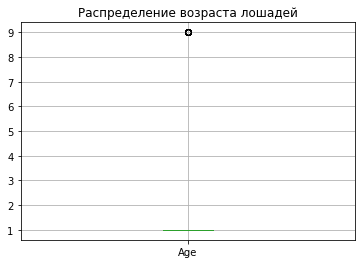

In [ ]:
horse_data['Age'].plot(kind='box',
                   title='Распределение возраста лошадей', grid=True)

In [ ]:
horse_data['Age'].value_counts()

1    276
9     24
Name: Age, dtype: int64

###Возраст
1 = Взрослая лошадь

2 = Молодой (< 6 месяцев)

**В данной колонке мы видим выброс в виде максимального значения , которое равно 9 , согласно описанию файла категория возраста должна быть 1 или 2, можем предположить что в 24 значениях, вместо категории, указывался возраст лошади **

**Расчитаем базовые статистики для столбца rectal_temperature**

In [ ]:
horse_data['rectal_temperature'].describe()

count    240.000000
mean      38.167917
std        0.732289
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: rectal_temperature, dtype: float64

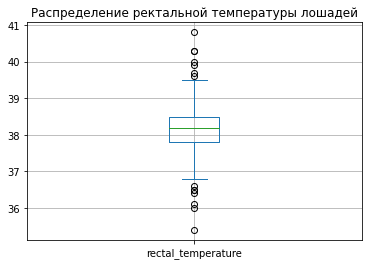

In [ ]:
horse_data['rectal_temperature'].plot(kind='box',
                   title='Распределение ректальной температуры лошадей', grid=True)

In [ ]:
horse_data['rectal_temperature'].quantile([0.25, 0.75])

0.25    37.8
0.75    38.5
Name: rectal_temperature, dtype: float64

In [ ]:
q1 = horse_data['rectal_temperature'].quantile(0.25)
q3 = horse_data['rectal_temperature'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = horse_data[horse_data['rectal_temperature'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66.0,28.0,3.0,5.0,2.0
1,1,1,39.2,88.0,20.0,NaN,3.0,3.0
2,2,1,38.3,40.0,24.0,1.0,3.0,1.0
3,1,9,39.1,164.0,84.0,4.0,2.0,2.0
4,2,1,37.3,104.0,35.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...
292,1,1,37.0,66.0,20.0,1.0,4.0,2.0
294,2,1,38.5,40.0,16.0,1.0,2.0,1.0
296,2,1,37.2,72.0,24.0,3.0,4.0,3.0
297,1,1,37.5,72.0,30.0,4.0,4.0,2.0


In [ ]:
horse_data[~horse_data['rectal_temperature'].between(lower_bound, upper_bound, inclusive=True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """Entry point for launching an IPython kernel.


,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
5,2,1,NaN,NaN,NaN,2.0,2.0,1.0
7,1,1,NaN,60.0,NaN,3.0,NaN,2.0
8,2,1,NaN,80.0,36.0,3.0,4.0,3.0
16,1,9,NaN,128.0,36.0,3.0,4.0,2.0
20,1,1,39.9,72.0,60.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...
282,1,1,NaN,70.0,16.0,3.0,2.0,2.0
288,1,1,NaN,NaN,NaN,NaN,NaN,1.0
293,1,1,NaN,78.0,24.0,3.0,NaN,3.0
295,1,1,NaN,120.0,70.0,4.0,2.0,3.0


###ректальная температура
- линейный
- в градусах Цельсия.
- Повышенная температура может возникнуть из-за инфекции.
- температура может быть снижена, когда животное находится в состоянии позднего шока
- нормальная температура составляет 37,8
- этот параметр обычно меняется по мере развития проблемы
например, может начаться нормально, затем стать повышенным из
-за поражения, возвращаясь в нормальный диапазон, когда
лошадь впадает в шок

**есть отсутствующие значения имеются выбросы в виде низкой и высокой температуры, но выбросоми мы их считать не будем, так они могут нести естественный характер, например при болезни животного высокая или низкая температура является нормальным явлением**

**Приведем данные к типу int ,расчитаем базовые статистики для столбца pulse**

In [ ]:
horse_data['pulse'] = horse_data['pulse'].astype('Int64')

In [ ]:
horse_data['pulse'].describe()

count    276.000000
mean      71.913043
std       28.630557
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64

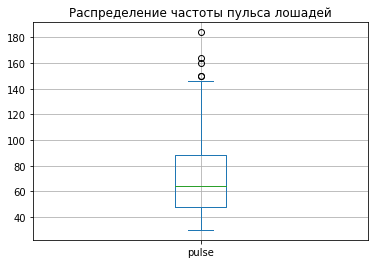

In [ ]:
horse_data['pulse'].plot(kind='box',
                   title='Распределение частоты пульса лошадей', grid=True)

In [ ]:
horse_data['pulse'].quantile([0.25, 0.75])

0.25    48
0.75    88
Name: pulse, dtype: Int64

In [ ]:
q1 = horse_data['pulse'].quantile(0.25)
q3 = horse_data['pulse'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = horse_data[horse_data['pulse'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66,28.0,3.0,5.0,2.0
1,1,1,39.2,88,20.0,NaN,3.0,3.0
2,2,1,38.3,40,24.0,1.0,3.0,1.0
4,2,1,37.3,104,35.0,NaN,NaN,2.0
6,1,1,37.9,48,16.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
295,1,1,NaN,120,70.0,4.0,2.0,3.0
296,2,1,37.2,72,24.0,3.0,4.0,3.0
297,1,1,37.5,72,30.0,4.0,4.0,2.0
298,1,1,36.5,100,24.0,3.0,3.0,1.0


In [ ]:
horse_data[~horse_data['pulse'].between(lower_bound, upper_bound, inclusive=True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """Entry point for launching an IPython kernel.


,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
3,1,9,39.1,164,84.0,4.0,2.0,2.0
41,2,9,39.0,150,72.0,NaN,NaN,1.0
55,1,9,38.6,160,20.0,3.0,3.0,2.0
255,1,9,38.8,184,84.0,1.0,4.0,2.0
275,1,9,38.8,150,50.0,1.0,5.0,2.0


###пульс
- линейный
- частота сердечных сокращений в ударах в минуту
- является отражением состояния сердца: 30 -40 - это нормально для взрослых
- редко встречается показатель ниже нормы, хотя спортивные лошади
может иметь скорость 20-25
- у животных с болезненными поражениями или страдающих от циркуляторного шока
может быть повышенная частота сердечных сокращений

**есть отсутствующие значения, наблюдаются выбросы в виде слишком высокой частоты пульса, но за выбросы их считать не будем, так как пульс может быть повышен из-за стресса животного(болезнь, забор анализов и т.п.)**

**Расчитаем базовые статистики для столбца respiratory_rate, приведем данные к типу int**

In [ ]:
horse_data['respiratory_rate'] = horse_data['respiratory_rate'].astype('Int64')

In [ ]:
horse_data['respiratory_rate'].describe()

count    242.000000
mean      30.417355
std       17.642231
min        8.000000
25%       18.500000
50%       24.500000
75%       36.000000
max       96.000000
Name: respiratory_rate, dtype: float64

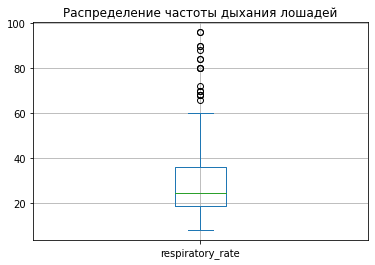

In [ ]:
horse_data['respiratory_rate'].plot(kind='box',
                   title='Распределение частоты дыхания лошадей', grid=True)

In [ ]:
horse_data['respiratory_rate'].quantile([0.25, 0.75])

0.25    18.5
0.75    36.0
Name: respiratory_rate, dtype: float64

In [ ]:
q1 = horse_data['respiratory_rate'].quantile(0.25)
q3 = horse_data['respiratory_rate'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)
remove_outliers = horse_data[horse_data['respiratory_rate'].between(lower_bound, upper_bound, inclusive=True)]
remove_outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  


,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66,28,3.0,5.0,2.0
1,1,1,39.2,88,20,NaN,3.0,3.0
2,2,1,38.3,40,24,1.0,3.0,1.0
4,2,1,37.3,104,35,NaN,NaN,2.0
6,1,1,37.9,48,16,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...
294,2,1,38.5,40,16,1.0,2.0,1.0
296,2,1,37.2,72,24,3.0,4.0,3.0
297,1,1,37.5,72,30,4.0,4.0,2.0
298,1,1,36.5,100,24,3.0,3.0,1.0


In [ ]:
horse_data[~horse_data['respiratory_rate'].between(lower_bound, upper_bound, inclusive=True)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  """Entry point for launching an IPython kernel.


,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
3,1,9,39.1,164,84,4.0,2.0,2.0
39,1,9,39.2,146,96,NaN,NaN,2.0
41,2,9,39.0,150,72,NaN,NaN,1.0
82,1,9,38.1,100,80,3.0,3.0,1.0
84,1,1,37.8,60,80,1.0,2.0,1.0
103,1,9,38.0,140,68,1.0,3.0,1.0
106,1,1,38.3,52,96,NaN,NaN,1.0
120,1,1,39.4,54,66,1.0,2.0,1.0
125,1,1,38.0,42,68,4.0,3.0,1.0
186,1,1,39.3,64,90,2.0,NaN,1.0


 ### частота дыхания
- линейный
- нормальная скорость составляет от 8 до 10
- полезность сомнительна из-за больших колебаний

**есть отсутствующие значения, выбросы есть, но опять можно их считать нормальными из-за того что лошади могут находиться в стрессовом состоянии**

**Расчитаем базовые статистики для столбца temperature_of_extremities, приведем данные к типу int**

In [ ]:
horse_data['temperature_of_extremities'] = horse_data['temperature_of_extremities'].astype('Int64')

In [ ]:
horse_data['temperature_of_extremities'].describe()

count    244.000000
mean       2.348361
std        1.045054
min        1.000000
25%        1.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: temperature_of_extremities, dtype: float64

In [ ]:
horse_data['temperature_of_extremities'].unique()

<IntegerArray>
[3, <NA>, 1, 4, 2]
Length: 5, dtype: Int64

### температура конечностей
- субъективный признак периферического кровообращения
- возможные значения:

1 = Нормальный

2 = Теплый

3 = Круто

4 = Холодно

- холодные конечности указывают на возможный шок
- горячие конечности должны коррелировать с повышенной ректальной температурой.

**есть отсутствующие значения, проверив уникальные значения, видим, что некорректных данных нет**

**Расчитаем базовые статистики для столбца pain, приведем данные к типу int**

In [ ]:
horse_data['pain'] = horse_data['pain'].astype('Int64')

In [ ]:
horse_data['pain'].describe()

count    245.00000
mean       2.95102
std        1.30794
min        1.00000
25%        2.00000
50%        3.00000
75%        4.00000
max        5.00000
Name: pain, dtype: float64

In [ ]:
horse_data['pain'].unique()

<IntegerArray>
[5, 3, 2, <NA>, 4, 1]
Length: 6, dtype: Int64

###боль 
 - субъективное суждение об уровне боли лошади.
- возможные значения:

1 = бдительность, отсутствие боли

2 = подавленный

3 = перемежающаяся легкая боль

4 = периодическая сильная боль

5 = непрерывная сильная боль

- не следует рассматривать как упорядоченную или дискретную переменную!
- В общем, чем болезненнее, тем больше вероятность того, что это потребует
хирургия
- предварительное лечение боли может в некоторой степени маскировать уровень боли

****есть отсутствующие значения, проверив уникальные значения, видим, что некорректных данных нет****

**Расчитаем базовые статистики для столбца outcome, приведем данные к типу int**

In [ ]:
horse_data['outcome'] = horse_data['outcome'].astype('Int64')

In [ ]:
horse_data['outcome'].describe()

count    299.000000
mean       1.551839
std        0.737187
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: outcome, dtype: float64

In [ ]:
horse_data['outcome'].unique()

<IntegerArray>
[2, 3, 1, <NA>]
Length: 4, dtype: Int64

## результат
- что в итоге случилось с лошадью?
- возможные значения:

1 = прожитый

2 = умер

3 = был подвергнут эвтаназии

**есть отсутствующие значения, проверив уникальные значения, видим, что некорректных данных нет**

##Задание 3
Работа с пропусками
Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них. Сформировать датафрейм, в котором пропуски будут отсутствовать.

In [ ]:
horse_data.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66,28,3,5,2
1,1,1,39.2,88,20,<NA>,3,3
2,2,1,38.3,40,24,1,3,1
3,1,9,39.1,164,84,4,2,2
4,2,1,37.3,104,35,<NA>,<NA>,2


**в столбце surgery? есть только одно отсутствующее значение , так же в данной строке нет информации в столбце outcome , которая по моему мнению, может являться главной информацией, поэтому просто удалим строку, так как в целом на аналитику это не повлияет**

In [ ]:
horse_data[horse_data['surgery?'].isna()]

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
132,<NA>,1,38.0,48,20,3,4,<NA>


In [ ]:
horse_data.drop(labels = [132],axis = 0, inplace = True)

**Исправим значение в столбце возраст , можем предположить , что скорее всего '9' - это возраст лошади , которая попадает под категорию
1 = Взрослая лошадь**

In [ ]:
horse_data['Age'] = horse_data[horse_data['Age'] == 9] = 1

In [ ]:
horse_data.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66,28,3,5,2
1,1,1,39.2,88,20,<NA>,3,3
2,2,1,38.3,40,24,1,3,1
3,1,1,39.1,164,84,4,2,2
4,2,1,37.3,104,35,<NA>,<NA>,2


**В возрасте пустых значений нет**

In [ ]:
horse_data[horse_data['Age'].isna()]

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome


In [ ]:
horse_data['Age'].unique()

array([1])

Исходя из уникальных значений можно сделать выввод, что в данном датасете только взрослые лошади

**Заменим пустые значения в колонке 'rectal_temperature'**

Рассмотрим значения медианы в разрезе групп surgery? и outcome (Age - возраст не берем, так как в датасете только взрослые лошади, respiratory_rate - в описании данных указано что слишком большой разброс и полезность сомнительна, temperature_of_extremities и pain -субъективные признаки, pulse - частота пульса не влияет на температуру тела у млекопитающих), и увидим, что данные, в зависимости от группы немного отличаются.
Чтобы данные были точнее заполним пропуски медианой в разрезе групп 

In [ ]:
print(horse_data['rectal_temperature'].std())
print(horse_data['rectal_temperature'].mean())

0.7337444096002357
38.16861924686192


In [ ]:
horse_data.groupby(['surgery?','outcome']).agg({'rectal_temperature': 'median'})

rectal_temperature
surgery? outcome                    
1        1                     38.20
         2                     38.10
         3                     38.00
2        1                     38.25
         2                     38.00
         3                     38.20

In [ ]:
horse_data['rectal_temperature'] = horse_data['rectal_temperature'].fillna(horse_data.groupby(['surgery?','outcome'])['rectal_temperature'].transform('median'))

In [ ]:
horse_data[horse_data['rectal_temperature'].isna()]

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome


In [ ]:
print(horse_data['rectal_temperature'].std())
print(horse_data['rectal_temperature'].mean())

0.6569686600218828
38.16304347826087


**Проделаем те же действия с той же логикой со столбцом pulse**

In [ ]:
print(horse_data['pulse'].std())
print(horse_data['pulse'].mean())

28.646218588429058
72.0


In [ ]:
horse_data.groupby(['surgery?','outcome']).agg({'pulse': 'median'})

pulse
surgery? outcome       
1        1         60.0
         2         84.0
         3         80.0
2        1         52.0
         2         92.0
         3         85.0

In [ ]:
horse_data['pulse'] = horse_data['pulse'].fillna(horse_data.groupby(['surgery?','outcome'])['pulse'].transform('median'))

In [ ]:
print(horse_data['pulse'].std())
print(horse_data['pulse'].mean())

27.78858528928684
71.92307692307692


**Заполним отсутствующие значения в столбце respiratory_rate**	
Так как значимость данных данного столбца сомнительна из-за больших колибаний, то просто заполним медианой (среднее значение не берем , так частота дыхания должна быть целым числом)

In [ ]:
print(horse_data['respiratory_rate'].std())
print(horse_data['respiratory_rate'].mean())

17.666101663764636
30.46058091286307


In [ ]:
horse_data['respiratory_rate'] =horse_data['respiratory_rate'].fillna(horse_data['respiratory_rate'].median())

In [ ]:
print(horse_data['respiratory_rate'].std())
print(horse_data['respiratory_rate'].mean())

16.0008220704168
29.401337792642142


**Заполним данные столбцов temperature_of_extremities**

Данные этого столбца являются субъективными, поэтому будет правильно заполнить отсутствующие значения модой, тем более что даже при низкой ректальной температуре конечности могут быть все равно горячими, если посмотреть данные в разрезе группировки по значению ректальной температуры.

In [ ]:
print(horse_data['temperature_of_extremities'].std())
print(horse_data['temperature_of_extremities'].mean())

1.0463690920064768
2.345679012345679


In [ ]:
horse_data.groupby(['rectal_temperature'])['temperature_of_extremities'].agg(pd.Series.mode)

rectal_temperature
35.40         3
36.00        []
36.10         3
36.40         3
36.50    [1, 3]
36.60         3
36.80        []
36.90         2
37.00    [1, 3]
37.10         3
37.20         3
37.30         1
37.40    [1, 3]
37.50         1
37.60         3
37.70         3
37.80         1
37.90         1
38.00         3
38.10         3
38.20         3
38.25         1
38.30    [1, 3]
38.40         1
38.50         3
38.60         2
38.70    [2, 3]
38.80         1
38.90         3
39.00         3
39.10    [2, 4]
39.20         4
39.30    [2, 4]
39.40    [1, 4]
39.50         3
39.60         3
39.70         3
39.90         1
40.00         3
40.30         3
40.80         3
Name: temperature_of_extremities, dtype: object

In [ ]:
horse_data['temperature_of_extremities'].fillna(horse_data['temperature_of_extremities'].mode()[0], inplace = True)

In [ ]:
print(horse_data['temperature_of_extremities'].std())
print(horse_data['temperature_of_extremities'].mean())

0.9769974558008493
2.468227424749164


**Заполним данные столбца pain**

Данные данного столбца субъективны, но мы можем предположить , что во время операции и в предсмертом состоянии лошадь ощущает более сильную боль, поэтому считаю правильным заполнить данные медианой в разрезе 'surgery?' , 'outcome'


In [ ]:
print(horse_data['pain'].std())
print(horse_data['pain'].mean())

1.2285555893671614
2.9732441471571907


In [ ]:
horse_data['pain'] = horse_data['pain'].fillna(horse_data.groupby(['surgery?','outcome'])['pain'].transform('median'))

In [ ]:
print(horse_data['pain'].std())
print(horse_data['pain'].mean())

1.2285555893671614
2.9732441471571907


In [ ]:
horse_data.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66,28,3,5,2
1,1,1,39.2,88,20,3,3,3
2,2,1,38.3,40,24,1,3,1
3,1,1,39.1,164,84,4,2,2
4,2,1,37.3,104,35,3,4,2


#Все отсутствующие значения датафрейма заполнены

In [ ]:
horse_data.head()

,surgery?,Age,rectal_temperature,pulse,respiratory_rate,temperature_of_extremities,pain,outcome
0,2,1,38.5,66,28,3,5,2
1,1,1,39.2,88,20,3,3,3
2,2,1,38.3,40,24,1,3,1
3,1,1,39.1,164,84,4,2,2
4,2,1,37.3,104,35,3,4,2


In [ ]:
horse_data.isnull().sum()

surgery?                      0
Age                           0
rectal_temperature            0
pulse                         0
respiratory_rate              0
temperature_of_extremities    0
pain                          0
outcome                       0
dtype: int64